In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
cleaned_data_link = "tier_1_features_only.csv" 

In [5]:
data = pd.read_csv(cleaned_data_link) #load the dataset from google drive link
#data = data.drop(columns = ['Product ID', 'Type'])
data

,funded_amnt,term,installment,annual_inc,dti,emp_length,home_ownership,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,is_default
0,3600.0,36,123.03,55000.0,5.91,10,1,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0
1,24700.0,36,820.28,65000.0,16.06,10,1,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0
2,10400.0,60,289.91,104433.0,25.37,3,1,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0
3,20000.0,36,637.58,180000.0,14.67,10,1,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,0
4,20000.0,36,631.26,85000.0,17.61,10,1,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986035,15000.0,36,487.47,60000.0,26.40,8,1,680.0,684.0,0.0,24.0,0.0,48654.0,36.1,42.0,0
986036,23800.0,60,559.85,119000.0,32.73,10,1,685.0,689.0,1.0,13.0,0.0,107747.0,89.5,29.0,0
986037,29400.0,60,683.94,180792.0,22.03,9,1,705.0,709.0,1.0,16.0,0.0,77480.0,85.2,32.0,0
986038,32000.0,60,752.74,157000.0,10.34,3,1,735.0,739.0,0.0,14.0,0.0,111598.0,27.4,18.0,1


C:\Users\Shawn\AppData\Local\Temp\ipykernel_19264\3676633741.py:14: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Shawn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


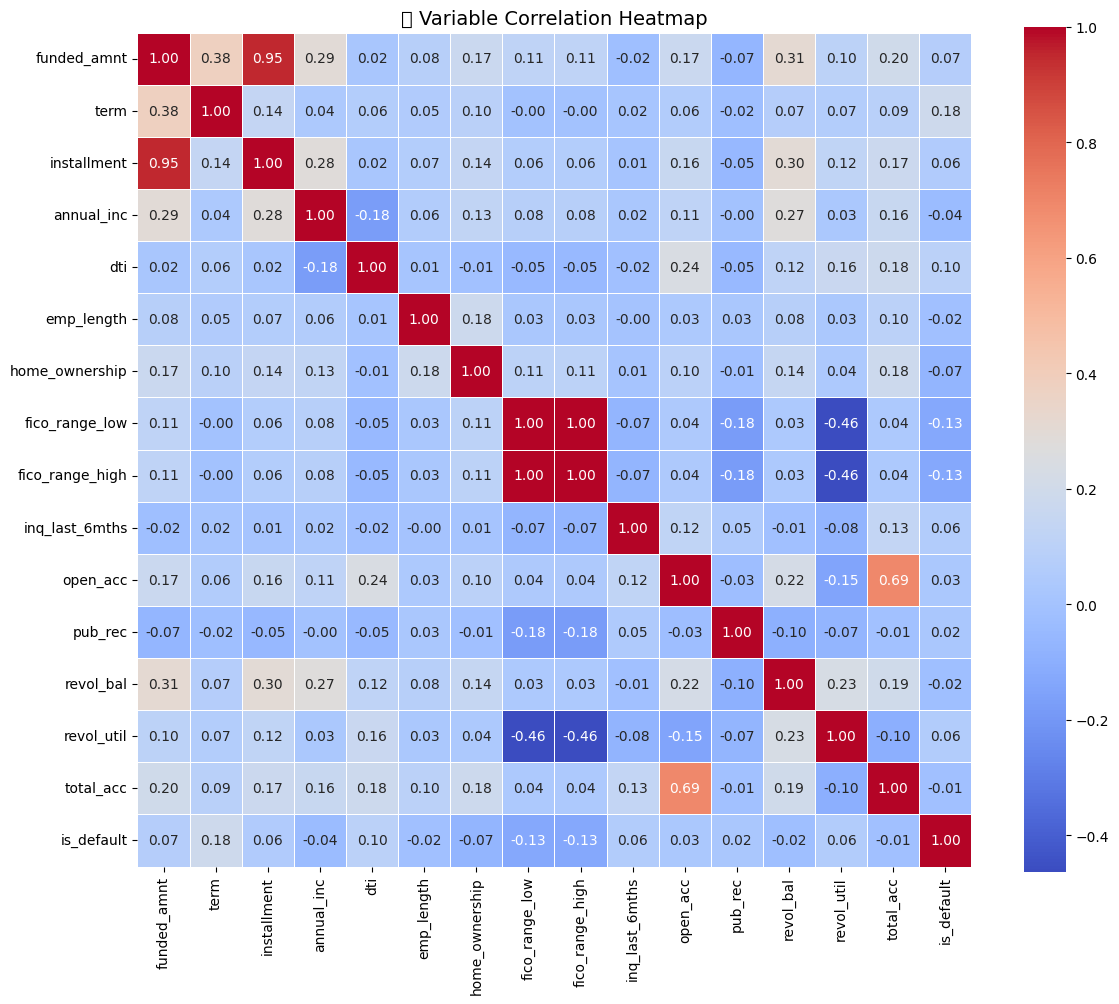

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("🔗 Variable Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
data = data.drop(columns=['fico_range_low', 'open_acc', 'installment'])

In [13]:
data['is_default'].value_counts()

is_default
0    790625
1    195415
Name: count, dtype: int64

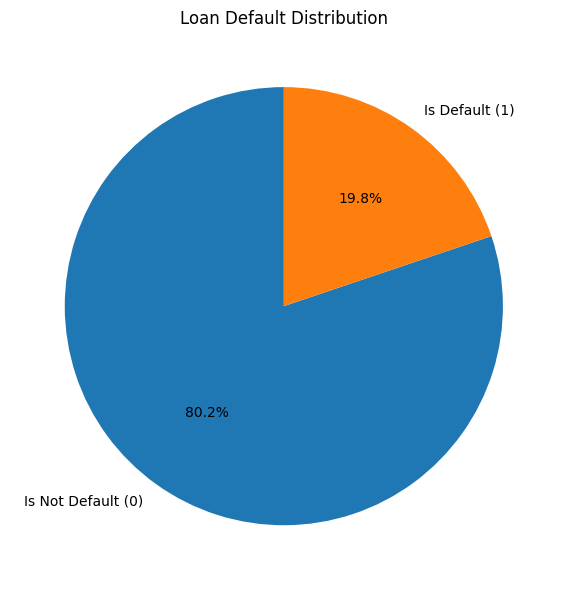

In [17]:
# Count values and assign labels
default_counts = data['is_default'].value_counts()
labels = ['Is Not Default (0)', 'Is Default (1)']

# Create pie chart with labels and formatting
plt.figure(figsize=(8, 6))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Loan Default Distribution')
plt.tight_layout()
plt.show()


# Handling Class Imbalance through Upsampling


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Separate majority and minority classes
majority = data[data['is_default'] == 0]
minority = data[data['is_default'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
upsampled = pd.concat([majority, minority_upsampled])

# Splitting the data
X = upsampled.drop('is_default', axis=1)
y = upsampled['is_default']

In [22]:
upsampled

,funded_amnt,term,annual_inc,dti,emp_length,home_ownership,fico_range_high,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,is_default
0,3600.0,36,55000.0,5.91,10,1,679.0,1.0,0.0,2765.0,29.7,13.0,0
1,24700.0,36,65000.0,16.06,10,1,719.0,4.0,0.0,21470.0,19.2,38.0,0
2,10400.0,60,104433.0,25.37,3,1,699.0,3.0,0.0,21929.0,64.5,35.0,0
3,20000.0,36,180000.0,14.67,10,1,684.0,0.0,0.0,87329.0,84.5,27.0,0
4,20000.0,36,85000.0,17.61,10,1,709.0,0.0,0.0,826.0,5.7,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177374,12975.0,60,36000.0,13.83,3,0,684.0,0.0,0.0,4163.0,38.5,15.0,1
442876,3200.0,36,32500.0,35.67,4,0,669.0,3.0,0.0,1511.0,72.0,31.0,1
121299,4425.0,36,30000.0,7.04,2,0,669.0,0.0,0.0,3345.0,54.0,12.0,1
560696,25000.0,60,89400.0,26.83,8,1,674.0,2.0,0.0,18521.0,89.5,26.0,1


In [25]:
upsampled.to_csv('UpsampledDataset.csv', index=False)

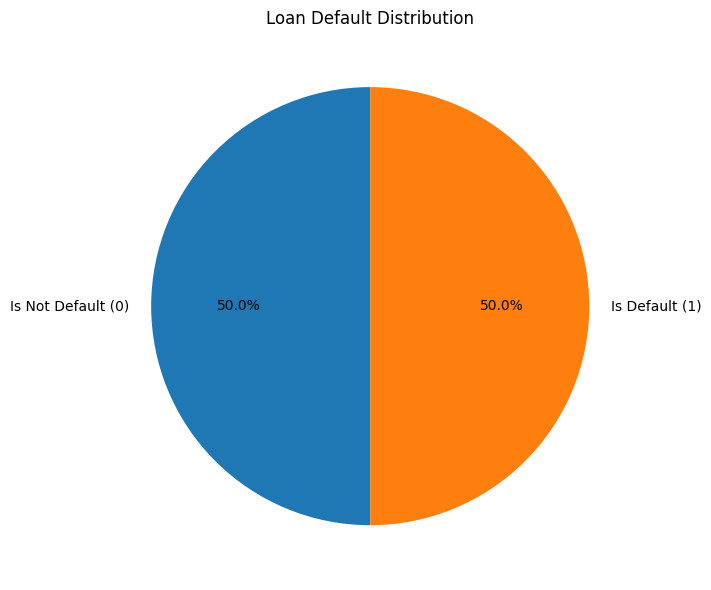

In [27]:
# Count values and assign labels
default_counts = upsampled['is_default'].value_counts()
labels = ['Is Not Default (0)', 'Is Default (1)']

# Create pie chart with labels and formatting
plt.figure(figsize=(8, 6))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Loan Default Distribution')
plt.tight_layout()
plt.show()

In [29]:
X = upsampled.drop('is_default', axis=1)
y = upsampled['is_default']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [34]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_knn = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[ 98132  59558]
 [ 24336 134224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70    157690
           1       0.69      0.85      0.76    158560

    accuracy                           0.73    316250
   macro avg       0.75      0.73      0.73    316250
weighted avg       0.75      0.73      0.73    316250

Accuracy Score: 0.7347225296442688


# KNN model using the hyperparameters

In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # You can adjust the range based on your problem
    'weights': ['uniform', 'distance'],  # Options for the weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric options
}

In [60]:
# Create a KNN classifier
knn = KNeighborsClassifier()

In [62]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [64]:
# Get the best model from grid search
best_knn = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_knn.predict(X_test_scaled)

In [66]:
# Evaluating the best model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))

# Save the best accuracy score
accuracy_knn_best = accuracy_score(y_test, y_pred_best)

Confusion Matrix:
[[640   2]
 [  0 584]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00       584

    accuracy                           1.00      1226
   macro avg       1.00      1.00      1.00      1226
weighted avg       1.00      1.00      1.00      1226

Accuracy Score: 0.99836867862969


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned
rf_classifier.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_rfc = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[147075  10615]
 [  4916 153644]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    157690
           1       0.94      0.97      0.95    158560

    accuracy                           0.95    316250
   macro avg       0.95      0.95      0.95    316250
weighted avg       0.95      0.95      0.95    316250

Accuracy Score: 0.9508901185770751


In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming this matches your variable setup
importances = rf_classifier.feature_importances_
feature_names = X_df.columns  # X_df = your imputed DataFrame with original names

# Build sorted DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.gca().invert_yaxis()
plt.title("🧠 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


NameError: name 'X_df' is not defined

C:\Users\Shawn\AppData\Local\Temp\ipykernel_19264\1017170182.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Shawn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


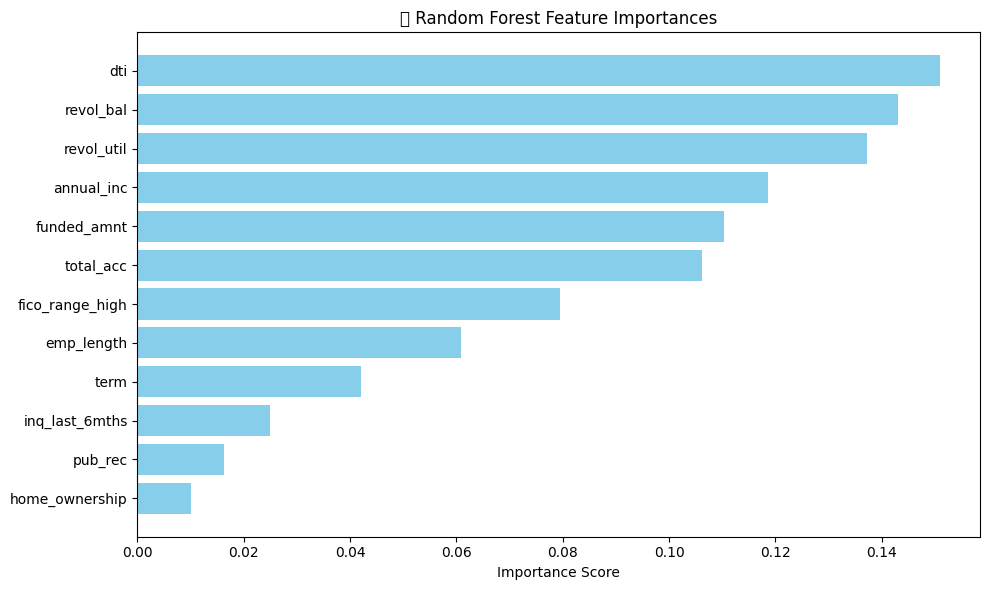

In [40]:
# Pull feature importances from the trained model
importances = rf_classifier.feature_importances_

# Get feature names from your DataFrame
feature_names = X.columns  # assuming X_df has imputed data with original column names

# Create a sorted dataframe for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot it!
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance Score')
plt.title('🔍 Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Random Forest using best hyperparameters

In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # You can adjust the range based on your problem
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [74]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [76]:
# Print the best parameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_rf_classifier.predict(X_test_scaled)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [78]:
# Evaluating the best model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))

# Save the best accuracy score
accuracy_rfc_best = accuracy_score(y_test, y_pred_best)

Confusion Matrix:
[[636   6]
 [  0 584]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       642
           1       0.99      1.00      0.99       584

    accuracy                           1.00      1226
   macro avg       0.99      1.00      1.00      1226
weighted avg       1.00      1.00      1.00      1226

Accuracy Score: 0.9951060358890701


In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# XGBoost

In [1]:
import xgboost as xgb

# Training the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_xgboost = accuracy_score(y_test, y_pred)

NameError: name 'X_train_scaled' is not defined

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
# Training the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_logistic = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[490 152]
 [200 384]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       642
           1       0.72      0.66      0.69       584

    accuracy                           0.71      1226
   macro avg       0.71      0.71      0.71      1226
weighted avg       0.71      0.71      0.71      1226

Accuracy Score: 0.7128874388254486


# Logistic Regression model using hyperparameters

In [89]:
from sklearn.linear_model import LogisticRegression
penalty = 'l2'
C = 1.0
solver = 'lbfgs'  # or 'newton-cg', 'liblinear', 'sag', 'saga'

# Create a LogisticRegression model with specified hyperparameters
logistic_model = LogisticRegression(penalty=penalty, C=C, solver=solver)


# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Save the accuracy score if needed
accuracy_logistic_best = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[490 152]
 [200 384]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       642
           1       0.72      0.66      0.69       584

    accuracy                           0.71      1226
   macro avg       0.71      0.71      0.71      1226
weighted avg       0.71      0.71      0.71      1226

Accuracy Score: 0.7128874388254486


# Support Vector Machine with linear kernel

In [92]:
from sklearn.svm import SVC

# Training the linear SVM model
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# Predictions and evaluation for linear SVM
y_pred_linear = svm_linear.predict(X_test_scaled)
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nLinear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_linear_svm = accuracy_score(y_test, y_pred)

Linear SVM Confusion Matrix:
 [[535 107]
 [230 354]]

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       642
           1       0.77      0.61      0.68       584

    accuracy                           0.73      1226
   macro avg       0.73      0.72      0.72      1226
weighted avg       0.73      0.73      0.72      1226

Accuracy Score: 0.7128874388254486


# Tuning the hyper parameters for SVM linear

In [95]:
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_svc_lin = GridSearchCV(svm_linear, param_grid, cv=5, verbose = 3)

# fitting the model for grid search
grid_svc_lin.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ............................C=0.01;, score=0.710 total time=   0.3s
[CV 2/5] END ............................C=0.01;, score=0.703 total time=   0.2s
[CV 3/5] END ............................C=0.01;, score=0.720 total time=   0.2s
[CV 4/5] END ............................C=0.01;, score=0.719 total time=   0.2s
[CV 5/5] END ............................C=0.01;, score=0.703 total time=   0.2s
[CV 1/5] END .............................C=0.1;, score=0.710 total time=   0.3s
[CV 2/5] END .............................C=0.1;, score=0.708 total time=   0.3s
[CV 3/5] END .............................C=0.1;, score=0.719 total time=   0.3s
[CV 4/5] END .............................C=0.1;, score=0.709 total time=   0.2s
[CV 5/5] END .............................C=0.1;, score=0.703 total time=   0.3s
[CV 1/5] END ...............................C=1;, score=0.712 total time=   0.4s
[CV 2/5] END ...............................C=1;,

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, verbose=3)

In [97]:
# print best parameter after tuning
print(grid_svc_lin.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc_lin.best_estimator_)

{'C': 0.01}
SVC(C=0.01, kernel='linear')


In [99]:
grid_predictions_svc_lin = grid_svc_lin.predict(X_test_scaled)
print(f" The testing data accuracy for the SVC linear model using best params is {accuracy_score(y_test, grid_predictions_svc_lin)}")
accuracy_linear_svm_best = accuracy_score(y_test, y_pred)

 The testing data accuracy for the SVC linear model using best params is 0.7251223491027733


In [101]:
# print classification report
print(classification_report(y_test, grid_predictions_svc_lin))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       642
           1       0.76      0.61      0.68       584

    accuracy                           0.73      1226
   macro avg       0.73      0.72      0.72      1226
weighted avg       0.73      0.73      0.72      1226



# SVM with non linear kernel

In [104]:
# Training the non-linear SVM model
svm_non_linear = SVC(kernel='rbf')  # 'rbf' is default, but explicitly stating for clarity
svm_non_linear.fit(X_train_scaled, y_train)

# Predictions and evaluation for non-linear SVM
y_pred_non_linear = svm_non_linear.predict(X_test_scaled)
print("Non-Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_non_linear))
print("\nNon-Linear SVM Classification Report:\n", classification_report(y_test, y_pred_non_linear))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracy_non_linear_svm = accuracy_score(y_test, y_pred)

Non-Linear SVM Confusion Matrix:
 [[579  63]
 [ 94 490]]

Non-Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       642
           1       0.89      0.84      0.86       584

    accuracy                           0.87      1226
   macro avg       0.87      0.87      0.87      1226
weighted avg       0.87      0.87      0.87      1226

Accuracy Score: 0.7128874388254486


# ROC curve for random Forest classifier

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Predict probabilities
y_pred_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Accuracy for all models

In [110]:
models = ['KNN', 'KNN (Best)', 'Logistic Regression', 'Logistic Regression (Best)', 'Linear SVM', 'Linear SVM (Best)', 'Non-Linear SVM', 'Random Forest', 'Random Forest (Best)', 'XGBoost']
accuracy = [accuracy_knn, accuracy_knn_best, accuracy_logistic, accuracy_logistic_best, accuracy_linear_svm, accuracy_linear_svm_best, accuracy_non_linear_svm, accuracy_rfc, accuracy_rfc_best, accuracy_xgboost]

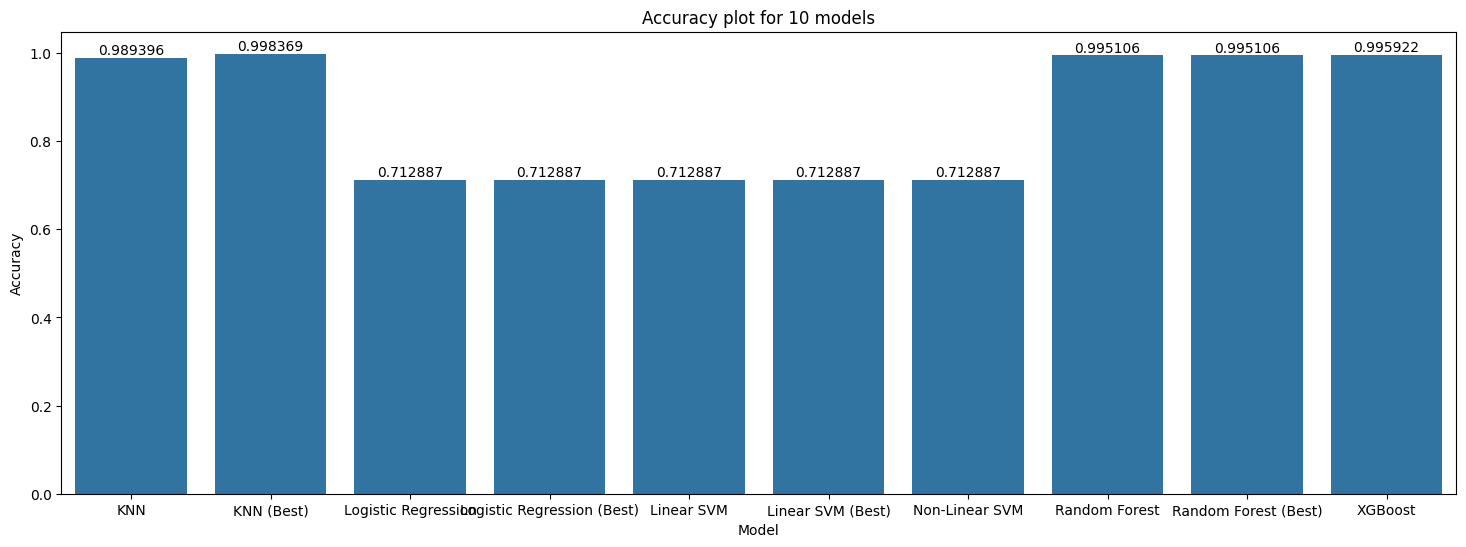

In [112]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.barplot(x=models, y=accuracy)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.xticks(range(len(models)), models)
plt.title(f"Accuracy plot for {len(accuracy)} models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [124]:
import joblib
joblib.dump(best_knn, 'model_knn.pkl')
joblib.dump(best_rf_classifier, 'model_rf.pkl')
joblib.dump(xgb_model, 'model_xgb.pkl')

['model_xgb.pkl']

In [118]:
joblib.dump(scaler, 'preprocessor.pkl')


['preprocessor.pkl']

In [120]:
pip install fastapi uvicorn joblib


Note: you may need to restart the kernel to use updated packages.
